
### Homework: Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [2]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
# Write your code here

import numpy as np # import numpy to use for setting the seed 

np.random.seed(0) #Set the seed to ensure consistence of results the different times the code is run

mall_customers.head(10) #These are the first 10 lines of the dataset

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [3]:

mall_customers.describe() #This a brief summary of the Dataframe statistics, including the 1. The Total number of items in each column 2. The mean values for numerical columns, minimum value, the quartiles and maximum value and 3. The standard deviation


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [4]:
from sklearn.preprocessing import StandardScaler

# Write your code here
# Dropped the Customer ID and the Address as it is categorical and the Customer ID is unlikely to have any  information with regards to customer behaviour or value
# Dropped the Deafaulted column as it is categorical, has missing values and is probably the class label of the dataset. This information whether the client dafaluted or not might not be available when we encounter a future customer therfore if we use it to build a clustering model it will not be accurate in the real world.
new_df = mall_customers.drop(['Customer Id', 'Address', 'Defaulted'], axis=1).copy() #The copy is to ensure a new data frame is created and not to just have the operations performed on the old data frame

scaler = StandardScaler() #This line instantiates the StandardScaler imported from sklearn this will be used to standardize the data

new_normalized_array = scaler.fit_transform(new_df) # Calculate (fit) the normalized values and replace (transform) the data with the calculated values

#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [5]:
from sklearn.cluster import KMeans
import sklearn # imported sklearn to be able to access the metrics module which has the silhouette score function

# Write your code here
from sklearn.decomposition import PCA
# Import the Principle Component Analysis function to be able to decompose the features along the most influential attributes

new_normalized_decomposed_array = PCA(n_components=2).fit_transform(new_normalized_array)
# fit and transform the normalized array. This will reduce the noise in the data and reduce the number of attributes that the model will use to fit and predict the clusters 


kmeans = KMeans(init="k-means++", n_clusters=3, n_init =12) #Instantiate the Kmeans funtion for 3 clusters

print(f'The silhouette score is: {sklearn.metrics.silhouette_score(new_normalized_decomposed_array, kmeans.fit_predict(new_normalized_decomposed_array))}') 
# Calculate the silhouette score and print it out using an f string

Kmeans_df = mall_customers.copy() # Create a copy of the mall_customers to ensure changes are performed on the new data frame

Kmeans_df['Cluster_Labels'] = pd.DataFrame(kmeans.fit_predict(new_normalized_decomposed_array)) 
# Create a new column with the heading Cluster_Labels and give it the values of the predicted clusters by the kmeans model

Centroids =  kmeans.cluster_centers_ # Get the value of the centroids 

Centroids_df  = pd.DataFrame(Centroids, index=["Cluster_1_Centroid", "Cluster_2_Centroid" , "Cluster_3_Centroid"], columns=['Component_1', 'Component_2']) 
#The normalized values of the centroids in a table format (Data frame) 

Centroids_df #Desplay the Data Frame of the Centroids

The silhouette score is: 0.37485522345308375


,Component_1,Component_2
Cluster_1_Centroid,-0.963537,0.400144
Cluster_2_Centroid,3.345680,0.804824
Cluster_3_Centroid,0.521009,-1.169603


**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


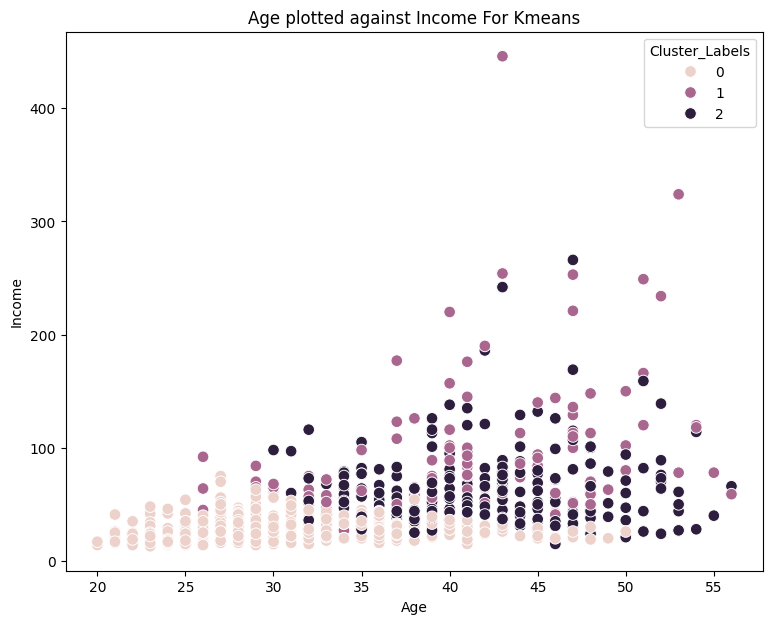

In [16]:
import matplotlib.pyplot as plt


# Write your code here
import seaborn as sns # Import seaborn to make the plotting of the graph easier 

fig = plt.figure(figsize= (9,7)) # Instantiate a figure object in matplotlib and pass the figsize of the area to draw/plot the graph
ax = fig.subplots() #Set Subplots

sns.scatterplot(x='Age', y='Income', hue='Cluster_Labels', data=Kmeans_df, s=70) 
#Plot a scatter plot in seaborn and declare the X axis values, y - axis values, the data frame to get the data from and the way to differentiate the colors of each dot. In this case we used the predicted cluster label that is why the hue is set to Cluster_Labels

ax.set_title('Age plotted against Income For Kmeans') # Set the title
ax.set_ylabel('Income') #Set the Y axis label
ax.set_xlabel('Age')#Set the X axis label
plt.show() 

### **Interpretation**

The above graph shows that the clusters are difficult to differentiate but customers with younger customers with lower income belong to cluster 0 with older customers with higher income belonging to cluster 2. There is significant overlap of the customers in Cluster 1 and 2 

#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [17]:
from sklearn.cluster import DBSCAN

# Write your code here
prev_val = -1 
#Set the base value for the silhouette score starting with -1 as the score ranges from -1 to 1. This score will be compared with the new calculated silhouted score Called val. If the new score is higher the best parameters will be reassigned anf the prev_val takes the value of the val

for i in range(5,19): #start a for loop to thourgh the values of min_samples starting with 5
    for j in [0.5,1,1.5,2,2.5,3.0,3.5,4.0,4.5]: #Nested loop of the eps 
        db_scan = DBSCAN(eps=j, min_samples=i).fit(new_normalized_array) #instantiate the DBSCAN with the parameters from the loop and the nested loo p
        val = sklearn.metrics.silhouette_score(new_normalized_array, db_scan.labels_) # Calculate the silhouette score
        Number_clusters =len(set(db_scan.labels_))
        if Number_clusters == 3: #Check the number of cluster labels and see if they are equal to 3
            if val >= prev_val: # Check if the new silhouette score is higher than the previus highest
                prev_val = val # re-assign the values of the best silhouette score 
                Best_Eps = j # re-assign the values of the best eps parameter 
                Best_Min = i # re-assign the values of the best min_samples parameter 
db_scan = DBSCAN(eps=Best_Eps, min_samples=Best_Min).fit(new_normalized_array) # use the best parameter from the above loop to instantiate the DBSCAN model
dbscan_df = mall_customers.copy() # Create a copy of the mall_customers to ensure changes are performed on the new data frame
dbscan_df['DB_Cluster_labels'] = db_scan.labels_ # Create a new column with the heading DB_Cluster_labels and give it the values of the predicted clusters by the DBSCAN model

**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

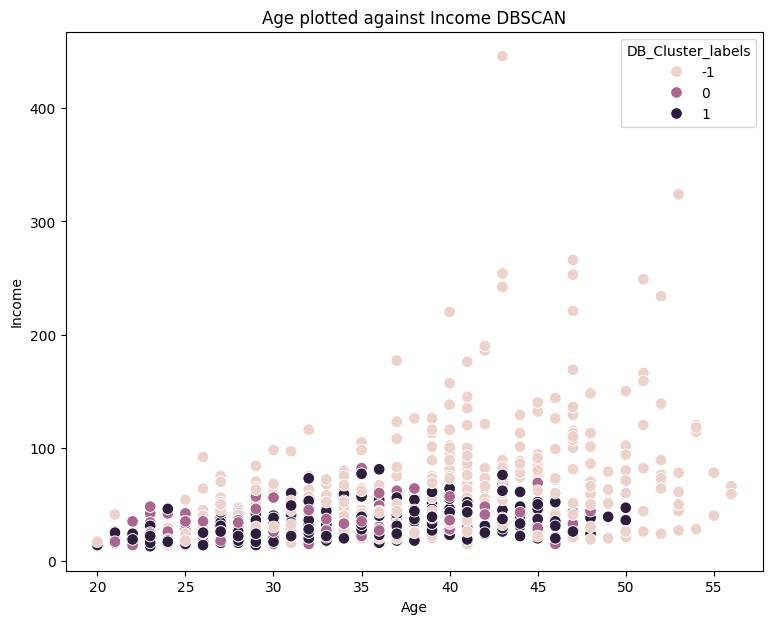

In [18]:
# Write your code here

fig = plt.figure(figsize= (9,7)) # Instantiate a figure object in matplotlib and pass the figsize of the area to draw/plot the graph
ax = fig.subplots() #Set Subplots

sns.scatterplot(x='Age', y='Income', hue='DB_Cluster_labels', data=dbscan_df, s=70) 
# Plot a scatter plot in seaborn and declare the X axis values, y - axis values, the data frame to get the data from and the way to differentiate the colors of each dot. In this case we used the predicted cluster label that is why the hue is set to DB_Cluster_labels
ax.set_title('Age plotted against Income DBSCAN') # Set the title
ax.set_ylabel('Income') #Set the  y axis
ax.set_xlabel('Age') #Set the  x axis
plt.show() # show the plot


### Comparison

The above graph shows poor separation of the clusters when ploted for Income against Age. Cluster 0 and Cluster 1 are completely mixed up. Cluster -1 is the noise. This mostly affects the older and high income customers which are more spread out. Showing that DBSCAN is unreliable with data that has different densities.

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [19]:
from sklearn.metrics import silhouette_score

# Write your code here

print(f'The silhouette score for the K Means clustering is : {sklearn.metrics.silhouette_score(new_normalized_decomposed_array, kmeans.fit_predict(new_normalized_decomposed_array))}') 
#Used f string to print the scores. called the silhouette_score function from the metrics module of sklearn and used  the kmeans model from above to fit and predict the data 
print(f'The silhouette score for the DBSCAN clustering is : {sklearn.metrics.silhouette_score(new_normalized_array, db_scan.fit_predict(new_normalized_array))}') 
#Used f string to print the scores. called the silhouette_score function from the metrics module of sklearn and used  the DBSCAN model from above to fit and predict the data 

The silhouette score for the K Means clustering is : 0.37485522345308375
The silhouette score for the DBSCAN clustering is : 0.02509565869328185


### Interpretation
The DBSCAN was unable to cluster the Data into clear clusters and had very low Silhouette score of 0.025. The Kmeans clustering had better clustering but still it did not adequately separate the data into clear clusters. It also had a low silhouette score. 
#### Strengths and Weaknesses 
The K means algorithm is sensitive to outliers, this might be the reason why the other two clusters had significant overlap. The  Kmeans clustering relies on the number of clusters that the user has to specify first and if the user is not aware of the number of clusters that are in the data. The K means clustering is difficult to use with non numerical data. DBSCAN was probably affected by the varying density of the data. 



#### Submission Instructions
Please submit your finished Jupyter Notebook with all exercises fully completed. Make sure to include comments in your code cells to clarify your thought process and results. Below each corresponding exercise, add your discussions in a "Markdown" section within this file.
